<a href="https://colab.research.google.com/github/shega2901/Detect-objects-Drone-Yolov5/blob/master/Project_YOLO5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Detecting objects with a drone using model YOLO5`

In [1]:
!git clone https://github.com/shega2901/Detect-objects-Drone-Yolov5  # clone repositary from my github
#%pip install virtualenv  # creating a virtual environment - virtualenv
#!virtualenv yolov5_training_env # create the virtual environment for YOLO5 training
%mv Detect-objects-Drone-Yolov5 yolov5  

Cloning into 'Detect-objects-Drone-Yolov5'...
remote: Enumerating objects: 10448, done.
remote: Counting objects: 100% (10448/10448), done.
remote: Compressing objects: 100% (3082/3082), done.
remote: Total 10448 (delta 7524), reused 10080 (delta 7335), pack-reused 0
Receiving objects: 100% (10448/10448), 88.57 MiB | 19.07 MiB/s, done.
Resolving deltas: 100% (7524/7524), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive') # mount google.colab


Mounted at /content/drive


In [5]:
%cd yolov5
%pip install -qr requirements.txt  # install required libraries for traning the model YOLO5
 
# The torch library different for GPU and CPU  
# Install without the torch library - remove lines from  requirements.txt with torch, torchvision:
#   torch>=1.7.0
#   torchvision>=0.8.1
# Install torch CPU version (windows):  
#!pip install torch==1.8.0+cpu torchvision==0.9.0+cpu torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html

# Install torck GPU version (windows, check compatibility cuda with torch: https://pytorch.org/get-started/previous-versions/): 
#!pip install torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html

/content/yolov5
     |████████████████████████████████| 596 kB 5.2 MB/s 


In [6]:
'''download pre-weight for training model yolo5'''
!bash data/scripts/download_weights.sh


100% 3.77M/3.77M [00:00<00:00, 22.2MB/s]

100% 14.0M/14.0M [00:00<00:00, 50.7MB/s]

100% 40.7M/40.7M [00:00<00:00, 108MB/s]

100% 89.2M/89.2M [00:01<00:00, 87.9MB/s]

100% 166M/166M [00:01<00:00, 100MB/s] 

100% 6.56M/6.56M [00:00<00:00, 35.8MB/s]

100% 24.5M/24.5M [00:00<00:00, 55.8MB/s]

100% 68.7M/68.7M [00:01<00:00, 62.5MB/s]

100% 147M/147M [00:02<00:00, 71.9MB/s]

100% 269M/269M [00:04<00:00, 70.4MB/s]



In [7]:
'''download dataset VISDrone train,val,test'''
%mkdir VisDrone_datasets
!bash data/scripts/get_visdrone.sh

100% 1.44G/1.44G [00:24<00:00, 63.6MB/s]
Unzipping VisDrone_datasets/VisDrone2019-DET-train.zip...
100% 77.9M/77.9M [00:01<00:00, 66.6MB/s]
Unzipping VisDrone_datasets/VisDrone2019-DET-val.zip...
100% 297M/297M [00:03<00:00, 85.1MB/s]
Unzipping VisDrone_datasets/VisDrone2019-DET-test-dev.zip...
100% 292M/292M [00:07<00:00, 39.6MB/s]
Unzipping VisDrone_datasets/VisDrone2019-DET-test-challenge.zip...


In [8]:
#Convert VisDrone to format YOLO
!bash data/scripts/convert_VisDrone_to_Yolo.sh

VisDrone_datasets/VisDrone2019-DET-train
100% 6471/6471 [01:00<00:00, 106.64it/s]
VisDrone_datasets/VisDrone2019-DET-val
100% 548/548 [00:06<00:00, 81.74it/s]
VisDrone_datasets/VisDrone2019-DET-test-dev
100% 1610/1610 [00:13<00:00, 117.56it/s]


In [9]:
# Run YOLOv5s on VisDrone
!python train.py --img 640 --batch 12 --epochs 10 --data ./data/VisDrone.yaml --weights ./weights/yolov5s.pt

train: weights=./weights/yolov5s.pt, cfg=, data=./data/VisDrone.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=10, batch_size=12, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/shega2901/Detect-objects-Drone-Yolov5 ✅
YOLOv5 🚀 v6.0-198-ge71d7f4 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degre

In [ ]:
#%cp /content/yolov5/runs/train/exp/eight/best.pt /content/gdrive/My\ Drive

# Validate model YOLOv5 on VisDrone2019-val dataset
Checking model accuracy on VisDrone2019 val datasets. Using the weights file - best.pt

Command explanation:<br>
<b>val.py:</b> python file containing the training code.<br>
<b>img:</b> image size defaulted to 640<br>
<b>data:</b> the path of VisDrone.yaml file.<br>
<b>task:</b> = val, default = val<br>
<b>weights:</b> The path to the weights file created during training.<br>



In [14]:
!python val.py --weights runs/train/exp2/weights/best.pt --data data/VisDrone.yaml --img 640 --iou 0.65 --half

val: data=data/VisDrone.yaml, weights=['runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.0-198-ge71d7f4 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7037095 parameters, 0 gradients, 15.9 GFLOPs
val: Scanning '../yolov5/VisDrone_datasets/VisDrone2019-DET-val/labels.cache' images and labels... 548 found, 0 missing, 0 empty, 0 corrupted: 100% 548/548 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 18/18 [00:43<00:00,  2.42s/it]
                 all        548      38759      0.309      0.279      0.242      0.122
          pedestrian        548       8844      0.307      0.406      0.339      0.134
              people       

YOLOv5 🚀 v6.0-198-ge71d7f4 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)


Setup complete ✅


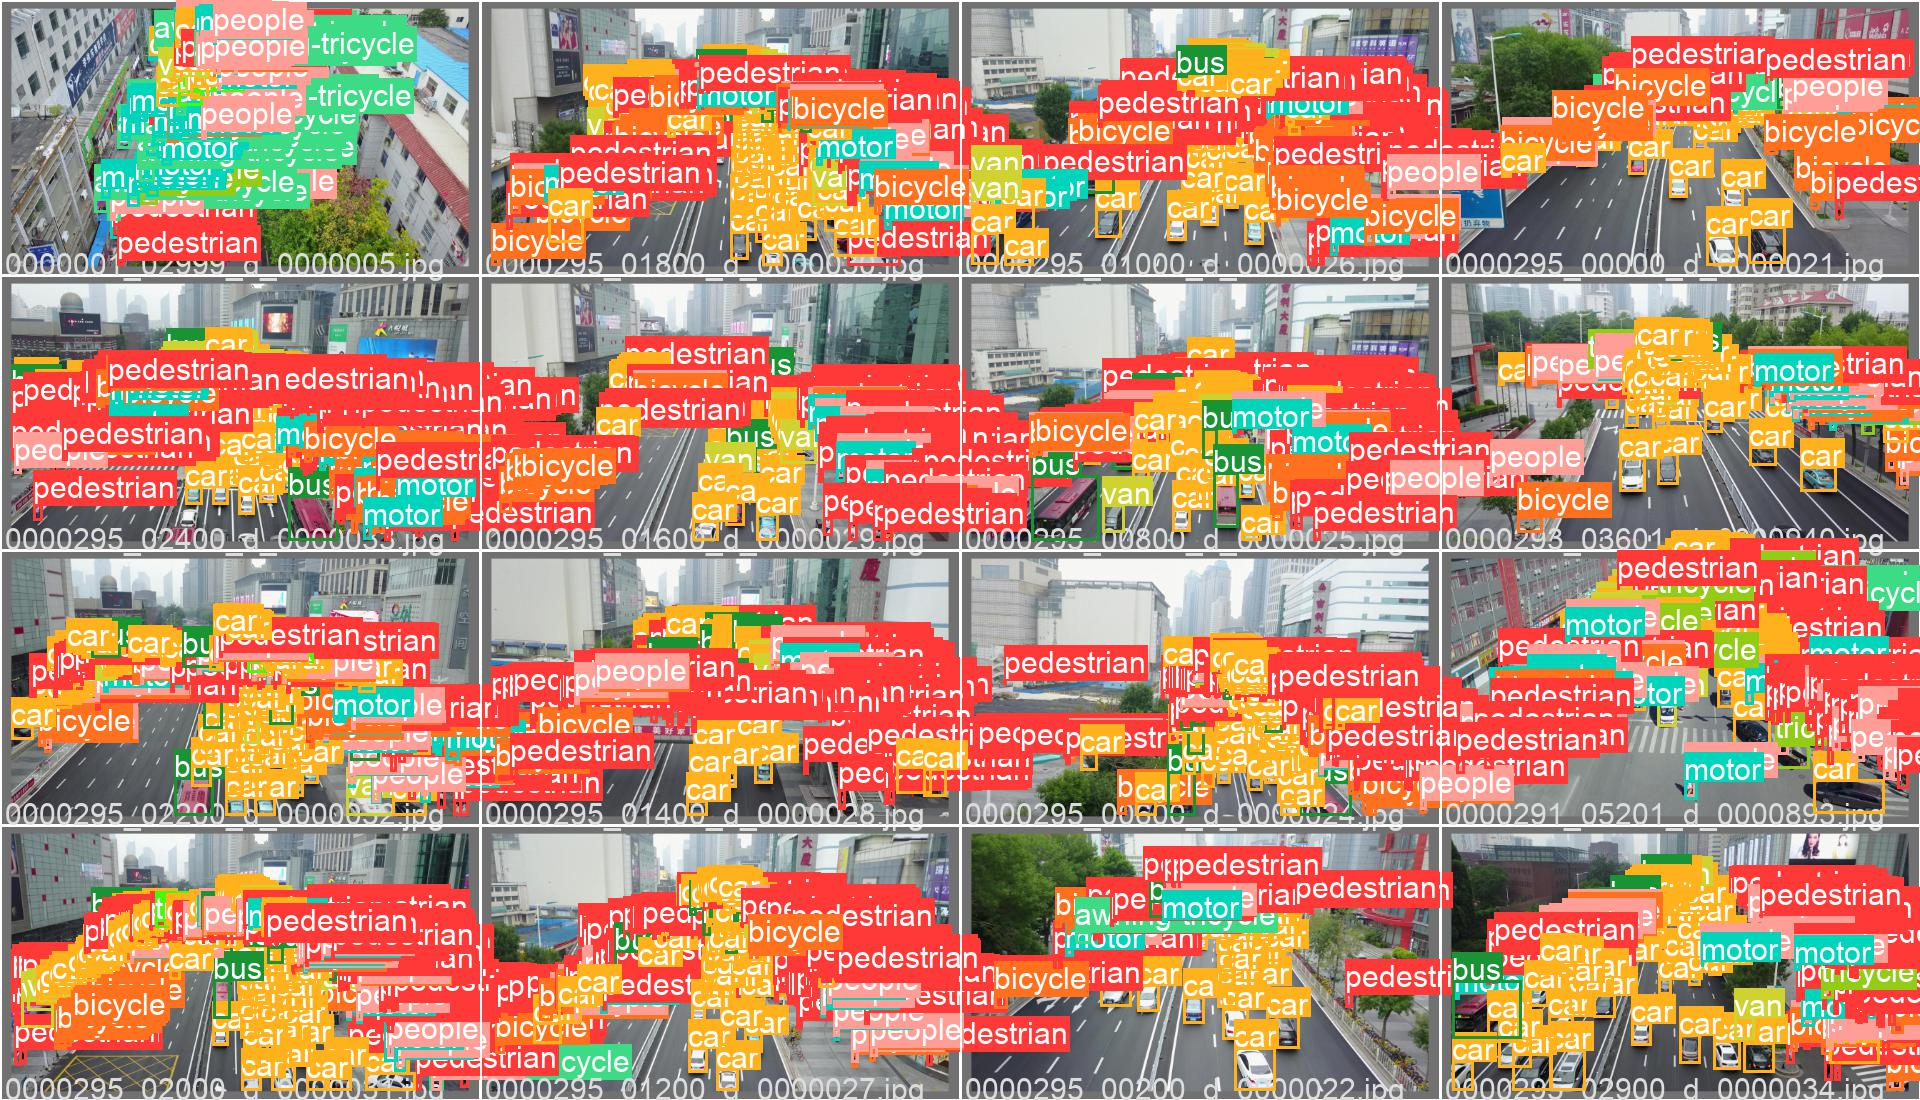

In [18]:
import utils
display = utils.notebook_init()  # checks
display.Image(filename='runs/val/exp2/val_batch0_labels.jpg', width=600)

# Validate-testing model YOLO on VisDrone2019-test-dev dataset
Checking model accuracy on VisDrone2019 val datasets. Using the weights file - best.pt

Command explanation:<br>
<b>val.py:</b> python file containing the training code.<br>
<b>img:</b> image size defaulted to 640<br>
<b>data:</b> the path of VisDrone.yaml file.<br>
<b>task:</b> = test, default = val<br>
<b>weights:</b> The path to the weights file created during training.<br>

In [19]:
!python val.py --weights runs/train/exp2/weights/best.pt --task test --data data/VisDrone.yaml --img 640 --iou 0.65 --half

val: data=data/VisDrone.yaml, weights=['runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, task=test, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.0-198-ge71d7f4 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7037095 parameters, 0 gradients, 15.9 GFLOPs
test: Scanning '../yolov5/VisDrone_datasets/VisDrone2019-DET-test-dev/labels' images and labels...1610 found, 0 missing, 0 empty, 0 corrupted: 100% 1610/1610 [00:04<00:00, 378.01it/s]
test: New cache created: ../yolov5/VisDrone_datasets/VisDrone2019-DET-test-dev/labels.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 51/51 [01:24<00:00,  1.65s/it]
                 all       1610      75102      0.319      0.253      0.213      0.108
          

YOLOv5 🚀 v6.0-198-ge71d7f4 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)


Setup complete ✅


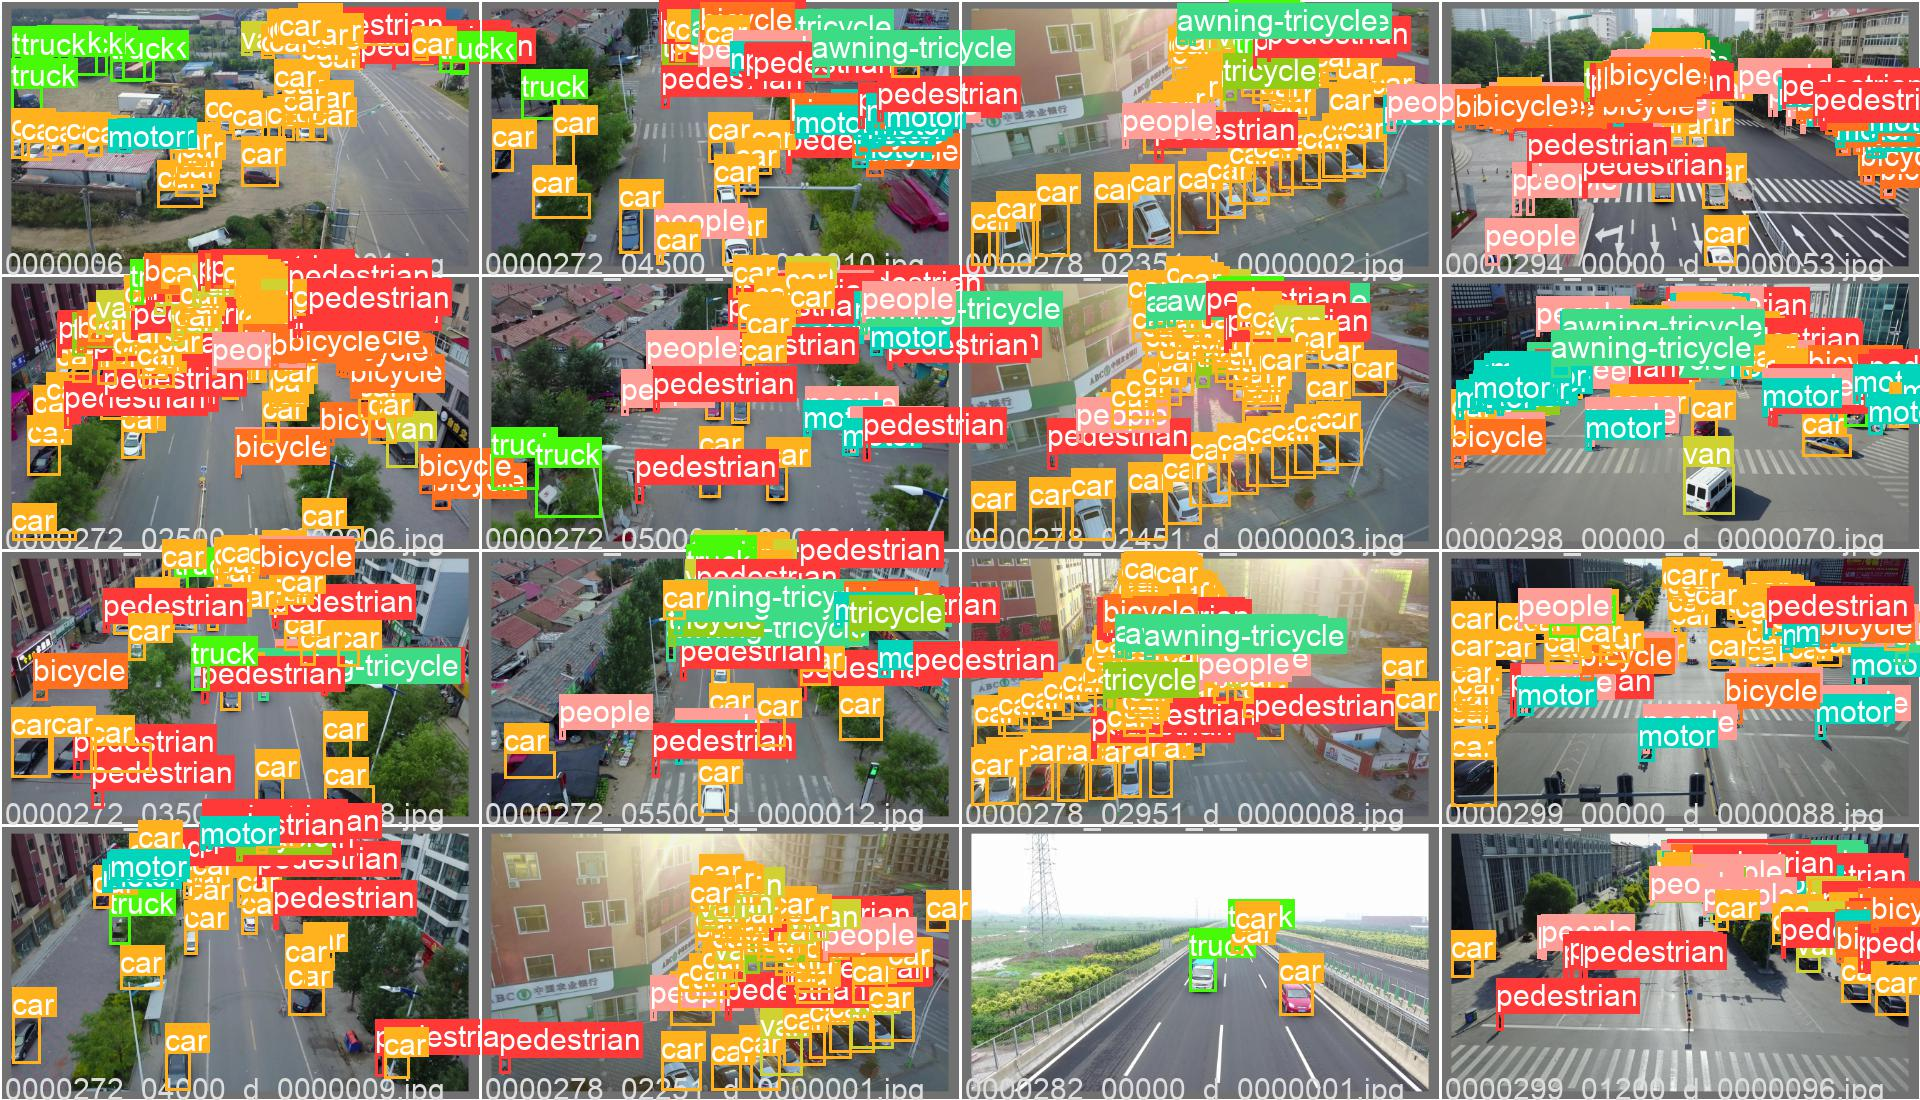

In [22]:
import utils
display = utils.notebook_init()  # checks
display.Image(filename='runs/val/exp3/val_batch0_labels.jpg', width=600)

# Inference with detect.py

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          path/  # directory
                          path/*.jpg  # glob
                          'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

Source  video file 181015-01-011_640.mp4

In [10]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('data/video/181015-01-011_640.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [11]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source data/video

detect: weights=['runs/train/exp/weights/best.pt'], source=data/video, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-198-ge71d7f4 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7037095 parameters, 0 gradients, 15.9 GFLOPs
video 1/1 (1/436) /content/yolov5/data/video/181015-01-011_640.mp4: 384x640 11 cars, Done. (0.024s)
video 1/1 (2/436) /content/yolov5/data/video/181015-01-011_640.mp4: 384x640 13 cars, Done. (0.023s)
video 1/1 (3/436) /content/yolov5/data/video/181015-01-011_640.mp4: 384x640 12 cars, Done. (0.022s)
video 1/1 (4/436) /content/yolov5/data/video/181015-01-011_640.mp4: 384x640 11 cars, Done. (0.023s)
video 

In [26]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('runs/detect/exp/181015-01-011_640.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Source  VisDrone2019-DET-test-chalange/images

In [30]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source VisDrone_datasets/VisDrone2019-DET-test-challenge/images/

detect: weights=['runs/train/exp/weights/best.pt'], source=VisDrone_datasets/VisDrone2019-DET-test-challenge/images/, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-198-ge71d7f4 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7037095 parameters, 0 gradients, 15.9 GFLOPs
image 1/1580 /content/yolov5/VisDrone_datasets/VisDrone2019-DET-test-challenge/images/0000000_00098_d_0000001.jpg: 384x640 29 pedestrians, 11 cars, Done. (0.029s)
image 2/1580 /content/yolov5/VisDrone_datasets/VisDrone2019-DET-test-challenge/images/0000000_01013_d_0000003.jpg: 384x640 36 pedestrians, 7 cars, Done. (0.027s)
image 3/1580 /content/yolov5/VisDr

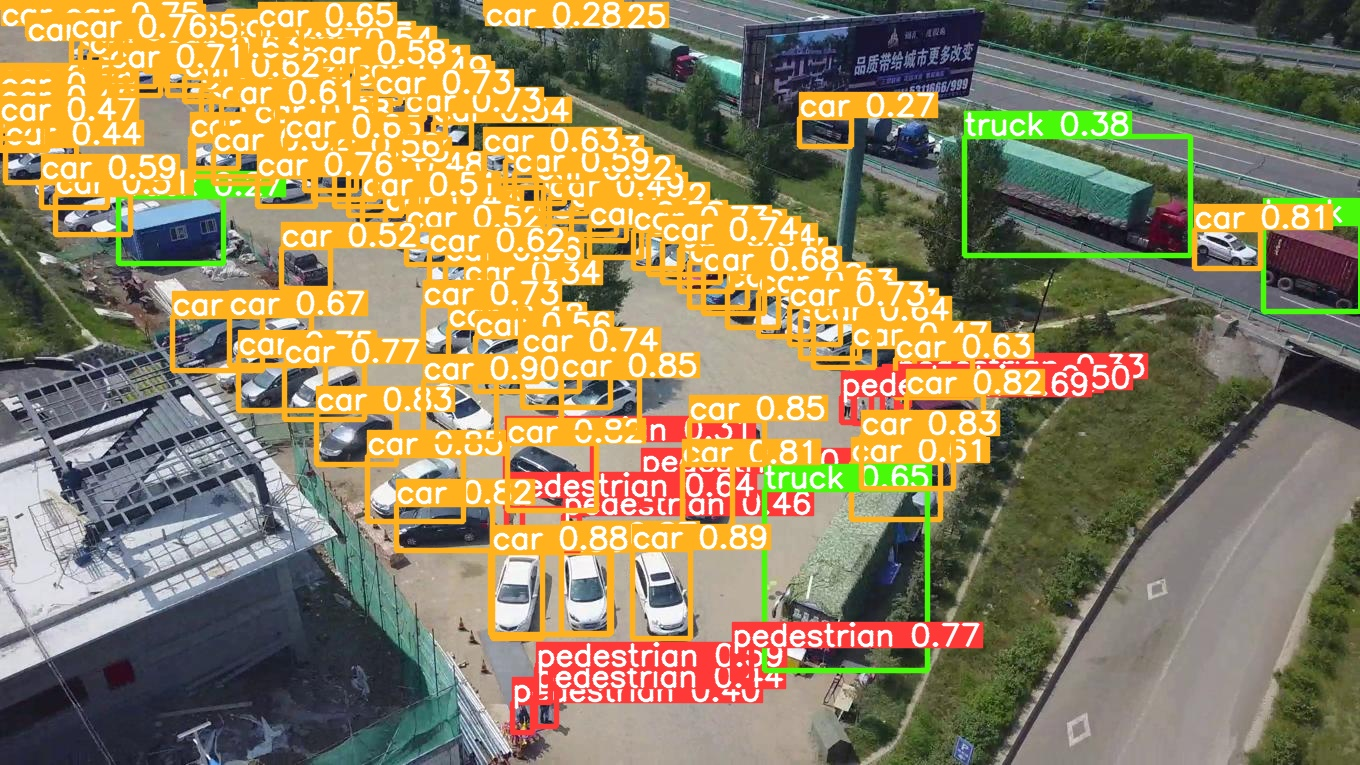

In [33]:
display.Image(filename='runs/detect/exp5/0000000_02309_d_0000006.jpg', width=1200)